# **Firewall log classification**

## Introduction

#####Après avoir importé les logs dans Elasticsearch et les analyser et visualiser c'est le temps d'utiliser des algorithmes ML.
#####Dans ce projet, nous allons résoudre un problème de classification de 65000 logs d'un firewall paloalto, où notre objectif sera de prédire quelle action va etre appliquer à un log d'entrée. 
#####Dans ce projet, nous allons utiliser  les algorithmes de classification les plus connus à savoir k-Nearest Neighbors,Decision Trees,Naive Bayes,Random Forest et nous allons contruire un DNN.


## table de matiére


1.   Importing libraries and modules,
2.   Load data,
3.   Preparing Data,
4.   GBN Classifier,
5.   KNN Classifier,
6.   Random forest Classifier,
7.   Decision tree Classifier
8.   Deep NN

## 1. Importing libraries and modules.

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

## 2. Load Data

####**Importing files from Google Drive in Colab**
notre dataset est stockée dans Google Drive donc nous avons besoin de 
lier notre compte Google Drive avec notre notebook.
1. La première étape consiste à monter notre Google Drive en exécutant le code en dessous.
2.  nous obtenons le code d'autorisation en nous connectant à notre compte Google.
3.   nous collons le code d'autorisation et nous appuyons sur Entrée.

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [3]:
Data_PATH=r'/gdrive/My Drive/firewall_csv.csv'

In [4]:
df=pd.read_csv(Data_PATH)

In [5]:
df.head()

,@timestamp,Source Port,Destination Port,Action,Bytes Sent,Bytes Received,Packets,pkts_sent,pkts_received,Bytes,Elapsed Time (sec)
0,2021-04-30T14:30:17.796Z,50270,445,drop,66,0,1,1,0,66,0
1,2021-04-30T14:30:17.796Z,50268,445,drop,66,0,1,1,0,66,0
2,2021-04-30T14:30:17.796Z,56103,21247,deny,66,0,1,1,0,66,0
3,2021-04-30T14:30:17.796Z,54874,445,drop,70,0,1,1,0,70,0
4,2021-04-30T14:30:17.796Z,54013,37965,deny,66,0,1,1,0,66,0


#3. Preparing Data

In [6]:
data=df.copy()

In [7]:
data=data[["Source Port","Destination Port","Bytes","Packets","Action","Elapsed Time (sec)"]]

In [8]:
print('The dataset contain {} rows and {} columns'.format(data.shape[0], data.shape[1]))

The dataset contain 65532 rows and 6 columns


In [9]:
data.dtypes

Source Port            int64
Destination Port       int64
Bytes                  int64
Packets                int64
Action                object
Elapsed Time (sec)     int64
dtype: object

In [10]:
(data.isna().sum()/data.shape[0]).sort_values()

Source Port           0.0
Destination Port      0.0
Bytes                 0.0
Packets               0.0
Action                0.0
Elapsed Time (sec)    0.0
dtype: float64

In [11]:
X=data[["Source Port","Destination Port","Bytes","Packets","Elapsed Time (sec)"]]
Y=data["Action"]

In [12]:
le = LabelEncoder()
y=le.fit_transform(Y)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20)

# 4.Gaussian Naive Bayes Classifier

In [14]:
model=GaussianNB()
gnb=model.fit(X_train,y_train)

print("Testing score",gnb.score(X_test,y_test))

Testing score 0.6436255436026551


In [15]:
from sklearn.metrics import classification_report
print("Classification Report")
print(classification_report(y_test,gnb.predict(X_test)))

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.39      0.56      7502
           1       0.71      0.98      0.82      3039
           2       0.43      1.00      0.60      2559
           3       0.00      0.00      0.00         7

    accuracy                           0.64     13107
   macro avg       0.53      0.59      0.49     13107
weighted avg       0.82      0.64      0.63     13107



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


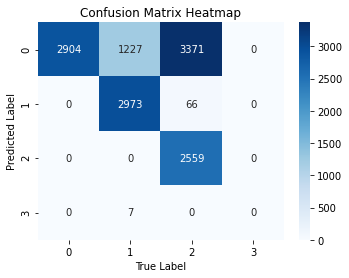

In [16]:
import seaborn as sb
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

gnb_predicted=gnb.predict(X_test)
gnb_confuse=confusion_matrix(y_test,gnb_predicted)
df_cm=pd.DataFrame(gnb_confuse)

plt.figure(figsize=(5.5,4))
sb.heatmap(df_cm,annot=True,fmt='g',cmap='Blues')
plt.title("Confusion Matrix Heatmap")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

# 5. KNeighborsClassifier

In [17]:
model=KNeighborsClassifier(n_neighbors=2)
knn=model.fit(X_train,y_train)

print("Testing score",knn.score(X_test,y_test))

Testing score 0.9775692378118562


In [18]:
from sklearn.metrics import classification_report
print("Classification Report")
print(classification_report(y_test,knn.predict(X_test)))

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      7502
           1       0.96      0.94      0.95      3039
           2       0.99      0.99      0.99      2559
           3       0.00      0.00      0.00         7

    accuracy                           0.98     13107
   macro avg       0.73      0.73      0.73     13107
weighted avg       0.98      0.98      0.98     13107



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


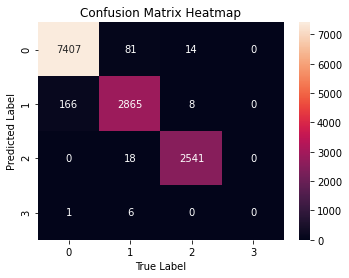

In [19]:
import seaborn as sb
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

knn_predicted=knn.predict(X_test)
knn_confuse=confusion_matrix(y_test,knn_predicted)
df_cm=pd.DataFrame(knn_confuse)

plt.figure(figsize=(5.5,4))
sb.heatmap(df_cm,annot=True,fmt='g')
plt.title("Confusion Matrix Heatmap")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

#6. Random Forest

In [20]:
model=RandomForestClassifier(n_estimators=100)
rf=model.fit(X_train,y_train)
print("Testing score",rf.score(X_test,y_test))

Testing score 0.997940032043946


In [21]:
from sklearn.metrics import classification_report
print("Classification Report")
print(classification_report(y_test,rf.predict(X_test)))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7502
           1       0.99      1.00      1.00      3039
           2       1.00      1.00      1.00      2559
           3       0.75      0.43      0.55         7

    accuracy                           1.00     13107
   macro avg       0.94      0.86      0.88     13107
weighted avg       1.00      1.00      1.00     13107



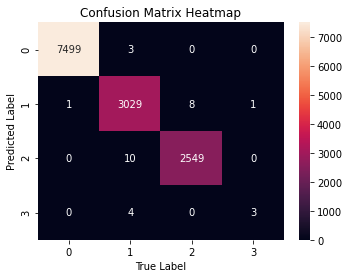

In [22]:
import seaborn as sb
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

rf_predicted=rf.predict(X_test)
rf_confuse=confusion_matrix(y_test,rf_predicted)
df_cm=pd.DataFrame(rf_confuse)

plt.figure(figsize=(5.5,4))
sb.heatmap(df_cm,annot=True,fmt='g')
plt.title("Confusion Matrix Heatmap")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

#7. Decision Tree

In [23]:
model=DecisionTreeClassifier()
dt=model.fit(X_train,y_train)
print("Testing score",dt.score(X_test,y_test))

Testing score 0.9977111467154955


In [24]:
from sklearn.metrics import classification_report
print("Classification Report")
print(classification_report(y_test,dt.predict(X_test)))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7502
           1       0.99      1.00      1.00      3039
           2       1.00      1.00      1.00      2559
           3       0.29      0.29      0.29         7

    accuracy                           1.00     13107
   macro avg       0.82      0.82      0.82     13107
weighted avg       1.00      1.00      1.00     13107



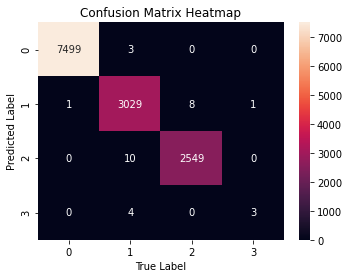

In [26]:
import seaborn as sb
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

dt_predicted=rf.predict(X_test)
dt_confuse=confusion_matrix(y_test,dt_predicted)
df_cm=pd.DataFrame(dt_confuse)

plt.figure(figsize=(5.5,4))
sb.heatmap(df_cm,annot=True,fmt='g')
plt.title("Confusion Matrix Heatmap")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

#8. DNN

In [28]:
from keras.utils import to_categorical
y_train = to_categorical(y_train,4)
y_test = to_categorical(y_test,4)

In [29]:
import tensorflow as tf
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense

In [30]:
model = Sequential()

model.add(Dense(16, activation='relu', input_shape=(5,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))

model.add(Dense(4, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
model.fit(X_train,y_train,epochs=10, batch_size=64, verbose=1)

Epoch 1/10
820/820 [==============================] - 2s 1ms/step - loss: 468.8003 - accuracy: 0.6118
Epoch 2/10
820/820 [==============================] - 1s 1ms/step - loss: 3.7840 - accuracy: 0.7747
Epoch 3/10
820/820 [==============================] - 1s 1ms/step - loss: 3.8355 - accuracy: 0.7852
Epoch 4/10
820/820 [==============================] - 1s 1ms/step - loss: 2.8163 - accuracy: 0.8207
Epoch 5/10
820/820 [==============================] - 1s 1ms/step - loss: 1.7030 - accuracy: 0.8557
Epoch 6/10
820/820 [==============================] - 1s 1ms/step - loss: 2.8981 - accuracy: 0.8518
Epoch 7/10
820/820 [==============================] - 1s 1ms/step - loss: 1.4654 - accuracy: 0.8770
Epoch 8/10
820/820 [==============================] - 1s 1ms/step - loss: 0.6027 - accuracy: 0.9076
Epoch 9/10
820/820 [==============================] - 1s 1ms/step - loss: 3.1073 - accuracy: 0.8552
Epoch 10/10
820/820 [==============================] - 1s 1ms/step - loss: 0.3601 - accuracy: 0.90

In [31]:
#train set
print("TRAIN SET:")
print("Loss du model est: " , model.evaluate(X_train,y_train)[0])
print("L'Accuracy du model est: " , model.evaluate(X_train,y_train)[1]*100 , "%")
# test set
print("TEST SET:")
print("Loss du model est: " , model.evaluate(X_test,y_test)[0])
print("L'Accuracy du model est: " , model.evaluate(X_test,y_test)[1]*100 , "%")


TRAIN SET:
1639/1639 [==============================] - 2s 954us/step - loss: 0.3561 - accuracy: 0.8956
Loss du model est:  0.3560827076435089
1639/1639 [==============================] - 2s 969us/step - loss: 0.3561 - accuracy: 0.8956
L'Accuracy du model est:  89.56032395362854 %
TEST SET:
410/410 [==============================] - 0s 920us/step - loss: 0.3543 - accuracy: 0.8949
Loss du model est:  0.3542711138725281
410/410 [==============================] - 0s 953us/step - loss: 0.3543 - accuracy: 0.8949
L'Accuracy du model est:  89.49416279792786 %
